In [1]:
import pandas as pd

In [2]:
import datetime

In [3]:
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [190105, 190112, 190119, 190126, 190202, 190209, 190216, 190223, 190302, 190309, 190316, 190323, 190330, 190406, 190413, 190420, 190427, 190504, 190511, 190518, 190525, 190601, 190608, 190615, 190622, 190629, 190706, 190713, 190720, 190727, 190803, 190810, 190817, 190824, 190831, 190907, 190914, 190921, 190928, 191005, 191012, 191019, 191026, 191102, 191109, 191116, 191123, 191130, 191207, 191214, 191221, 191228, 200104, 200111, 200118, 200125, 200201, 200208, 200215, 200222, 200229, 200307, 200314, 200321, 200328, 200404, 200411, 200418, 200425, 200502, 200509, 200516, 200523, 200530, 200606, 200613, 200620, 200627, 200704, 200711, 200718, 200725, 200801, 200808, 200815, 200822, 200829, 200905, 200912, 200919, 200926, 201003, 201010, 201017, 201024, 201031, 201107, 201114, 201121, 201128, 201205, 201212, 201219, 201226, 210102, 210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515]
turnstiles_df = get_data_parse_dt(week_nums)
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2018-12-29 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920
1,2018-12-29 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936
2,2018-12-29 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038
3,2018-12-29 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101
4,2018-12-29 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173


In [4]:
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
turnstiles_df.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

In [7]:
# Date format is modified in order be able to be indexed
turnstiles_df["DATE"] = pd.to_datetime(turnstiles_df.DATE, format="%m/%d/%Y")

In [8]:
turnstiles_df.dtypes

DATE_TIME    datetime64[ns]
C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE         datetime64[ns]
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
dtype: object

In [9]:
turnstiles_df.DATE_TIME.dt.hour

0          3
1          7
2         11
3         15
4         19
          ..
209034     5
209035     9
209036    13
209037    17
209038    21
Name: DATE_TIME, Length: 25676574, dtype: int64

In [10]:
turnstiles_df.DATE_TIME.dt.weekday

0         5
1         5
2         5
3         5
4         5
         ..
209034    4
209035    4
209036    4
209037    4
209038    4
Name: DATE_TIME, Length: 25676574, dtype: int64

In [11]:
# Over 2 years of MTA data
turnstiles_df.DATE.value_counts().sort_index()

2018-12-29    28591
2018-12-30    28648
2018-12-31    28959
2019-01-01    28742
2019-01-02    28691
              ...  
2021-05-10    29931
2021-05-11    29849
2021-05-12    29877
2021-05-13    29982
2021-05-14    29761
Name: DATE, Length: 868, dtype: int64

### Interlude: Duplicate Entries
Now let's run some diagnostics on the data and see approaches to cleaning before tackling problem 3

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe: 

In [12]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2018-12-29 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,03:00:00,REGULAR,6889287,2335920
1,2018-12-29 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,07:00:00,REGULAR,6889299,2335936
2,2018-12-29 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,11:00:00,REGULAR,6889364,2336038
3,2018-12-29 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,15:00:00,REGULAR,6889605,2336101
4,2018-12-29 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,19:00:00,REGULAR,6889966,2336173


In [13]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
194904,2018-12-29 03:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,2018-12-29,03:00:00,REGULAR,14383932,3170889
194905,2018-12-29 07:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,2018-12-29,07:00:00,REGULAR,14384058,3170900
194906,2018-12-29 11:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,2018-12-29,11:00:00,REGULAR,14384442,3170948
194907,2018-12-29 15:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,2018-12-29,15:00:00,REGULAR,14384860,3171020
194908,2018-12-29 19:00:00,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,2018-12-29,19:00:00,REGULAR,14385248,3171133


In [14]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2181472,B024,R211,00-05-00,KINGS HWY,2021-05-02 20:00:00,2
21013854,R283,R221,00-00-02,167 ST,2019-04-15 12:00:00,2
10435375,N324,R018,00-06-03,JKSN HT-ROOSVLT,2021-04-14 00:00:00,2
6164537,N045,R187,01-06-00,81 ST-MUSEUM,2019-07-09 09:00:00,2
5269959,K019,R413,00-00-00,KNICKERBOCKER,2019-01-28 12:00:00,2


In [15]:
# On 2019/4/15, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R283") & 
(turnstiles_df["UNIT"] == "R221") & 
(turnstiles_df["SCP"] == "00-00-02") & 
(turnstiles_df["STATION"] == "167 ST") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 4, 15).date()))

turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
165850,2019-04-15 00:00:00,R283,R221,00-00-02,167 ST,4,IRT,2019-04-15,00:00:00,REGULAR,15466191,9554400
165851,2019-04-15 04:00:00,R283,R221,00-00-02,167 ST,4,IRT,2019-04-15,04:00:00,REGULAR,15466222,9554456
165852,2019-04-15 08:00:00,R283,R221,00-00-02,167 ST,4,IRT,2019-04-15,08:00:00,REGULAR,15466827,9554542
165853,2019-04-15 12:00:00,R283,R221,00-00-02,167 ST,4,IRT,2019-04-15,12:00:00,REGULAR,12190738,1311555
165854,2019-04-15 12:00:00,R283,R221,00-00-02,167 ST,4,IRT,2019-04-15,12:00:00,RECOVR AUD,15467493,9554739


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [16]:
turnstiles_df.DESC.value_counts()

REGULAR       25569515
RECOVR AUD      107059
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [17]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [18]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29 03:00:00,1
17117399,R138,R293,00-03-04,34 ST-PENN STA,2020-04-22 22:00:00,1
17117421,R138,R293,00-03-04,34 ST-PENN STA,2020-04-26 14:00:00,1
17117420,R138,R293,00-03-04,34 ST-PENN STA,2020-04-26 10:00:00,1
17117419,R138,R293,00-03-04,34 ST-PENN STA,2020-04-26 06:00:00,1


In [19]:
turnstiles_df.DESC.value_counts()

REGULAR       25569515
RECOVR AUD      106606
Name: DESC, dtype: int64

In [20]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29 03:00:00,1
17117399,R138,R293,00-03-04,34 ST-PENN STA,2020-04-22 22:00:00,1
17117421,R138,R293,00-03-04,34 ST-PENN STA,2020-04-26 14:00:00,1
17117420,R138,R293,00-03-04,34 ST-PENN STA,2020-04-26 10:00:00,1
17117419,R138,R293,00-03-04,34 ST-PENN STA,2020-04-26 06:00:00,1


### Problem 3a
- Each combination of `C/A`, `UNIT`, `SCP`, and `STATION` represents a unique turnstile. Take a look at one specific turnstile on a specific date. What does each row in the dataframe represent?
- Obtain the maximum `ENTRIES` value for each day, for each unique turnstile.

Let's take a look at a specific turnstile on a specific date.

Looks like each row represents a turnstile (identified by a combination of  the `C/A`, `UNIT`, `SCP`, and `STATION` columns) at a specific time -- approximately four hours apart. The `ENTRIES` column represents **cumulative entries** at that point in time.

In [21]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "08/27/2019")]

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1409,2019-08-27 20:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2019-08-27,20:00:00,REGULAR,301814,1202658
1408,2019-08-27 16:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2019-08-27,16:00:00,REGULAR,301110,1201933
1407,2019-08-27 12:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2019-08-27,12:00:00,REGULAR,300940,1201436
1406,2019-08-27 08:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2019-08-27,08:00:00,REGULAR,300840,1199765
1405,2019-08-27 04:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2019-08-27,04:00:00,REGULAR,300813,1199234
1404,2019-08-27 00:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2019-08-27,00:00:00,REGULAR,300780,1199203


The maximum `ENTRIES` value would occur at the last reading of the day. Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the `.first()` DataFrame method.

In [22]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [23]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29,6890186
1,A002,R051,02-00-00,59 ST,2018-12-30,6890894
2,A002,R051,02-00-00,59 ST,2018-12-31,6891946
3,A002,R051,02-00-00,59 ST,2019-01-01,6892430
4,A002,R051,02-00-00,59 ST,2019-01-02,6893894


### Problem 3b
- Use the daily maximum `ENTRIES` calculations from Problem 3a. Recall that the `ENTRIES` column contains **cumulative entries** on each day. We would now like you to calculate **daily entries**, i.e. the number of new entries gained each day.
- *Hint:* Group the data by turnstile. Check out the `.shift()` (or `.diff()`) DataFrame methods for this purpose. *Ensure things make sense;* you *may* need to use the  `.apply()` method for abnormalities.

In [24]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [25]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2018-12-29,6890186,NaT,NaN
1,A002,R051,02-00-00,59 ST,2018-12-30,6890894,2018-12-29,6890186.0
2,A002,R051,02-00-00,59 ST,2018-12-31,6891946,2018-12-30,6890894.0
3,A002,R051,02-00-00,59 ST,2019-01-01,6892430,2018-12-31,6891946.0
4,A002,R051,02-00-00,59 ST,2019-01-02,6893894,2019-01-01,6892430.0


In [26]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
4263011,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-10,5554,2021-05-09,5554.0
4263012,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-11,5554,2021-05-10,5554.0
4263013,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-12,5554,2021-05-11,5554.0
4263014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-13,5554,2021-05-12,5554.0
4263015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-05-14,5554,2021-05-13,5554.0


In [27]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

**Gut check**. We should expect *positive* daily entries, and nothing drastically large.

In [28]:
(turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"]).describe()

count    4.257806e+06
mean     7.958892e+02
std      7.657859e+06
min     -2.129137e+09
25%      6.300000e+01
50%      3.030000e+02
75%      8.480000e+02
max      2.139011e+09
dtype: float64

A few things are happening:
- We have negative values.
- Some values are *way* too big (see the difference between the `max` and the `75%` percentile). 

We can address these all at once.

In [29]:
# How many rows are backwards
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(40379, 8)

In [30]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
4281,A002,R051,02-03-02,59 ST,2021-03-22,238,2021-03-21,6641395.0
8153,A002,R051,02-05-00,59 ST,2019-12-18,12,2019-12-17,216.0
9728,A002,R051,02-06-00,59 ST,2019-07-13,524,2019-07-12,258249.0
9873,A002,R051,02-06-00,59 ST,2019-12-05,1091,2019-12-04,130724.0
9943,A002,R051,02-06-00,59 ST,2020-02-13,889,2020-02-12,82625.0


### Interlude: Reverse Entries

To try and investigate what is going on, we'll pick one of these turnstile-days (namely, the first one), and check the course of events.

In [31]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "R730") & 
(turnstiles_df["UNIT"] == "R431") & 
(turnstiles_df["SCP"] == "00-00-04") & 
(turnstiles_df["STATION"] == "EASTCHSTER/DYRE") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.date(2021, 4, 12)))

In [32]:
turnstiles_df[mask].sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]

,DATE,TIME,ENTRIES,EXITS
207894,2021-04-12,01:00:00,1559816595,1728243543
207895,2021-04-12,05:00:00,1559816594,1728243543
207896,2021-04-12,09:00:00,1559816519,1728243561
207897,2021-04-12,13:00:00,1559816494,1728243568
207898,2021-04-12,17:00:00,1559816456,1728243599
207899,2021-04-12,21:00:00,1559816427,1728243617


It looks like the counter is working in reverse for `ENTRIES`.

In [33]:
# Let's see how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
.groupby(["C/A", "UNIT", "SCP", "STATION"])
.size())

C/A    UNIT  SCP       STATION        
A002   R051  02-03-02  59 ST                1
             02-05-00  59 ST                1
             02-06-00  59 ST                4
A006   R079  00-00-04  5 AV/59 ST           1
             00-03-00  5 AV/59 ST           1
                                         ... 
R729   R292  00-00-01  BAYCHESTER AV        1
R730   R431  00-00-04  EASTCHSTER/DYRE    855
S101   R070  00-00-04  ST. GEORGE           1
             00-00-06  ST. GEORGE           1
TRAM1  R468  00-00-01  RIT-MANHATTAN        2
Length: 1465, dtype: int64

In [34]:
def get_daily_counts(row, max_counter):
    '''
    Initial attempt at dealing with reversed counters
    '''
    
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # If counter (daily count) is > 43K, then the counter might have been reset.  
        # Set count to zero as different counters have different cycle limits
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')

        return 0
    
    return counter


_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=43000)

entries: 238 <-- 6641395.0
entries: 524289 <-- 152.0
entries: 524 <-- 258249.0
entries: 1091 <-- 130724.0
entries: 889 <-- 82625.0
entries: 22 <-- 7896791.0
entries: 60 <-- 9437429.0
entries: 262144 <-- 0.0
entries: 4 <-- 7832194.0
entries: 120 <-- 885834996.0
entries: 197 <-- 16816011.0
entries: 216 <-- 1562636326.0
entries: 298 <-- 1663107163.0
entries: 2536906 <-- 1091900.0
entries: 52806 <-- 17116894.0
entries: 9 <-- 1562921334.0
entries: 0 <-- 1663146135.0
entries: 59 <-- 154688.0
entries: 3082 <-- 1390173.0
entries: 458755 <-- 7.0
entries: 289 <-- 3055256.0
entries: 12 <-- 6170034.0
entries: 37 <-- 268285.0
entries: 348 <-- 1237351900.0
entries: 487 <-- 44749.0
entries: 117 <-- 11715665.0
entries: 459077 <-- 85175465.0
entries: 1279 <-- 5664363.0
entries: 1443 <-- 7054160.0
entries: 147 <-- 317728.0
entries: 198 <-- 5102094.0
entries: 1261 <-- 3875856.0
entries: 1009 <-- 334675.0
entries: 962 <-- 2117561.0
entries: 738 <-- 18398229.0
entries: 263 <-- 3846402.0
entries: 235208427 

entries: 279 <-- 8291685.0
entries: 650 <-- 65979.0
entries: 262144 <-- 33554713.0
entries: 116 <-- 6197971.0
entries: 66 <-- 1121336148.0
entries: 82 <-- 2025847506.0
entries: 1451 <-- 4711879.0
entries: 458903 <-- 1265085.0
entries: 110 <-- 629380.0
entries: 23 <-- 117492.0
entries: 38 <-- 90148.0
entries: 205 <-- 50255.0
entries: 43 <-- 248382.0
entries: 237 <-- 474424.0
entries: 533 <-- 479739.0
entries: 323 <-- 204182.0
entries: 5 <-- 148587.0
entries: 1574 <-- 73420.0
entries: 1761 <-- 90500.0
entries: 712 <-- 211718.0
entries: 437 <-- 83634.0
entries: 84770 <-- 10238.0
entries: 2342 <-- 102694.0
entries: 663 <-- 175865.0
entries: 0 <-- 86120.0
entries: 425 <-- 70795.0
entries: 118 <-- 199055.0
entries: 1129 <-- 68842.0
entries: 215 <-- 560268.0
entries: 862 <-- 137053.0
entries: 365 <-- 137941.0
entries: 682 <-- 52964.0
entries: 171 <-- 83359.0
entries: 3845206 <-- 1319028.0
entries: 1319880 <-- 3845206.0
entries: 1101041 <-- 2010630.0
entries: 2011711 <-- 1101041.0
entries: 137

entries: 178 <-- 6625781.0
entries: 217 <-- 4780275.0
entries: 262297 <-- 1566066.0
entries: 393224 <-- 117441229.0
entries: 0 <-- 458752.0
entries: 4982302 <-- 877264.0
entries: 196635 <-- 809796.0
entries: 524295 <-- 43491.0
entries: 134277383 <-- 525023.0
entries: 458765 <-- 134277578.0
entries: 393218 <-- 1990.0
entries: 0 <-- 393218.0
entries: 1534984195 <-- 0.0
entries: 4 <-- 1534984197.0
entries: 67109632 <-- 1.0
entries: 196626 <-- 609086.0
entries: 458791 <-- 679184.0
entries: 333721 <-- 464687.0
entries: 464846 <-- 333721.0
entries: 2555909 <-- 514058.0
entries: 2301353 <-- 2563511.0
entries: 2563619 <-- 2301353.0
entries: 582 <-- 3243165.0
entries: 278 <-- 5239290.0
entries: 721042 <-- 343.0
entries: 318 <-- 3251529.0
entries: 75 <-- 61346.0
entries: 1421 <-- 2254274.0
entries: 68 <-- 2414727.0
entries: 644485176 <-- 3992050.0
entries: 81 <-- 644689531.0
entries: 103 <-- 273242.0
entries: 498 <-- 5413988.0
entries: 1924779 <-- 147365.0
entries: 147655 <-- 1924779.0
entries: 

entries: 589824 <-- 866455.0
entries: 1325342697 <-- 11664580.0
entries: 762 <-- 5951485.0
entries: 10 <-- 5679392.0
entries: 1114119 <-- 822258.0
entries: 1747 <-- 1114121.0
entries: 196611 <-- 1904.0
entries: 31 <-- 4058137.0
entries: 1145 <-- 4459356.0
entries: 187 <-- 7855959.0
entries: 517 <-- 1786225.0
entries: 499 <-- 42927148.0
entries: 458755 <-- 7537.0
entries: 86 <-- 975954.0
entries: 262144 <-- 2.0
entries: 7 <-- 5433033.0
entries: 5436427 <-- 7.0
entries: 31 <-- 105771.0
entries: 625 <-- 3795641.0
entries: 1397029 <-- 3004522.0
entries: 1804857 <-- 1397778.0
entries: 494 <-- 1930690.0
entries: 33030166 <-- 42.0
entries: 262144 <-- 1.0
entries: 192 <-- 54359.0
entries: 14 <-- 49426.0
entries: 653 <-- 112092.0
entries: 259 <-- 313950.0
entries: 533 <-- 110132.0
entries: 100 <-- 65034.0
entries: 1 <-- 95561.0
entries: 33 <-- 98005.0
entries: 307 <-- 57529.0
entries: 22 <-- 382183.0
entries: 256 <-- 83447.0
entries: 94 <-- 175933.0
entries: 30 <-- 110832.0
entries: 93 <-- 1516

entries: 238 <-- 733761.0
entries: 1958 <-- 1696178.0
entries: 269 <-- 70751.0
entries: 1977 <-- 1058528.0
entries: 2019 <-- 987950.0
entries: 941 <-- 155545.0
entries: 0 <-- 1078800.0
entries: 323 <-- 415675.0
entries: 2291 <-- 907453.0
entries: 1209 <-- 432090.0
entries: 2257 <-- 2792918.0
entries: 613 <-- 424921.0
entries: 100 <-- 335200.0
entries: 134 <-- 106174.0
entries: 534 <-- 422094.0
entries: 796 <-- 227083.0
entries: 556 <-- 71089.0
entries: 140 <-- 167717.0
entries: 94 <-- 277936.0
entries: 77 <-- 48136.0
entries: 163 <-- 77258.0
entries: 17 <-- 197449.0
entries: 81 <-- 195766.0
entries: 97 <-- 540908.0
entries: 410 <-- 101409.0
entries: 172 <-- 428500.0
entries: 0 <-- 469655.0
entries: 148 <-- 140513.0
entries: 71 <-- 160029.0
entries: 232 <-- 206835.0
entries: 609 <-- 114058.0
entries: 105 <-- 82815.0
entries: 504 <-- 275255.0
entries: 687 <-- 499862.0
entries: 146 <-- 400468.0
entries: 1371 <-- 45621.0
entries: 1196 <-- 116461.0
entries: 143683 <-- 6589.0
entries: 106 <-

entries: 1154271193 <-- 13402588.0
entries: 8 <-- 1275742.0
entries: 1152 <-- 1715604.0
entries: 262296 <-- 8864207.0
entries: 524329 <-- 120318011.0
entries: 208 <-- 597819.0
entries: 720922 <-- 19342.0
entries: 458765 <-- 6627951.0
entries: 1152 <-- 9012539.0
entries: 1752 <-- 72820.0
entries: 846 <-- 342032.0
entries: 8 <-- 7436261.0
entries: 1194 <-- 16913394.0
entries: 146 <-- 36965539.0
entries: 1007 <-- 59957.0
entries: 853 <-- 527878.0
entries: 1103 <-- 8614840.0
entries: 280 <-- 258852.0
entries: 873 <-- 862763.0
entries: 195 <-- 9679898.0
entries: 212 <-- 6658385.0
entries: 1280 <-- 5249083.0
entries: 60 <-- 5373982.0
entries: 246 <-- 5366245.0
entries: 80 <-- 299026.0
entries: 978 <-- 1365405.0
entries: 808 <-- 1736661.0
entries: 907 <-- 2357444.0
entries: 524434 <-- 2338090.0
entries: 12 <-- 4887261.0
entries: 15439231 <-- 6237114.0
entries: 338 <-- 15440422.0
entries: 1359886 <-- 4065.0
entries: 767 <-- 9441238.0
entries: 1058618 <-- 102390450.0
entries: 18 <-- 1437665.0
e

entries: 15753262 <-- 3953152.0
entries: 3953156 <-- 15763173.0
entries: 8833626 <-- 9129980.0
entries: 9129981 <-- 8847125.0
entries: 10014605 <-- 9293579.0
entries: 39242377 <-- 15747786.0
entries: 15764523 <-- 39256787.0
entries: 2319 <-- 789868.0
entries: 170 <-- 139740.0
entries: 30933984 <-- 6069289.0
entries: 569320809 <-- 779039.0
entries: 323 <-- 7193764.0
entries: 27 <-- 181453.0
entries: 27 <-- 2549195.0
entries: 850 <-- 703406488.0
entries: 366 <-- 261118.0
entries: 1769479 <-- 584463.0
entries: 1030 <-- 1769479.0
entries: 115 <-- 12739117.0
entries: 2923 <-- 588310.0
entries: 1050 <-- 6737904.0
entries: 1675 <-- 102075.0
entries: 220 <-- 643213.0
entries: 592403 <-- 4715175.0
entries: 196 <-- 4008525.0
entries: 852524 <-- 2830560.0
entries: 688 <-- 141769497.0
entries: 262144 <-- 143.0
entries: 131072 <-- 12.0
entries: 66470 <-- 17650908.0
entries: 32 <-- 6478782.0
entries: 285 <-- 3953135.0
entries: 357 <-- 4470823.0
entries: 70 <-- 30154514.0
entries: 973006018 <-- 29802

entries: 428 <-- 12408037.0
entries: 1715 <-- 13653626.0
entries: 253 <-- 8326649.0
entries: 185 <-- 100298.0
entries: 88 <-- 5368770.0
entries: 42 <-- 73530.0
entries: 280 <-- 2867953.0
entries: 876 <-- 1848475.0
entries: 119 <-- 1208346.0
entries: 20917 <-- 2555393.0
entries: 7705071 <-- 24440.0
entries: 96 <-- 517547.0
entries: 322 <-- 5112443.0
entries: 422 <-- 5596546.0
entries: 20 <-- 4362546.0
entries: 345 <-- 2876591.0
entries: 768 <-- 66754.0
entries: 128 <-- 1589490.0
entries: 1117457 <-- 3429648.0
entries: 13396 <-- 1905657.0
entries: 2 <-- 209693.0
entries: 589954 <-- 67610294.0
entries: 2301788 <-- 592439.0
entries: 401 <-- 2301788.0
entries: 6118016 <-- 39944.0
entries: 23 <-- 6119125.0
entries: 70 <-- 873543.0
entries: 16102 <-- 114601.0
entries: 23 <-- 5309695.0
entries: 22 <-- 1311420.0
entries: 24 <-- 2562789.0
entries: 3570 <-- 1327888.0
entries: 1328230 <-- 2569869.0
entries: 262144 <-- 458752.0
entries: 21 <-- 115056.0
entries: 112 <-- 1210137.0
entries: 528 <-- 16

A more involved attempt at dealing with reversed counters

In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=43000)

entries: 238 <-- 6641395.0
entries: 524289 <-- 152.0
entries: 524 <-- 258249.0
entries: 1091 <-- 130724.0
entries: 889 <-- 82625.0
entries: 22 <-- 7896791.0
entries: 60 <-- 9437429.0
entries: 262144 <-- 0.0
entries: 4 <-- 7832194.0
entries: 120 <-- 885834996.0
entries: 197 <-- 16816011.0
entries: 216 <-- 1562636326.0
entries: 298 <-- 1663107163.0
entries: 2536906 <-- 1091900.0
entries: 52806 <-- 17116894.0
entries: 9 <-- 1562921334.0
entries: 0 <-- 1663146135.0
entries: 59 <-- 154688.0
entries: 3082 <-- 1390173.0
entries: 458755 <-- 7.0
entries: 289 <-- 3055256.0
entries: 12 <-- 6170034.0
entries: 37 <-- 268285.0
entries: 348 <-- 1237351900.0
entries: 487 <-- 44749.0
entries: 117 <-- 11715665.0
entries: 459077 <-- 85175465.0
entries: 1279 <-- 5664363.0
entries: 1443 <-- 7054160.0
entries: 147 <-- 317728.0
entries: 198 <-- 5102094.0
entries: 1261 <-- 3875856.0
entries: 1009 <-- 334675.0
entries: 962 <-- 2117561.0
entries: 738 <-- 18398229.0
entries: 263 <-- 3846402.0
entries: 235208427 

entries: 279 <-- 8291685.0
entries: 650 <-- 65979.0
entries: 262144 <-- 33554713.0
entries: 116 <-- 6197971.0
entries: 66 <-- 1121336148.0
entries: 82 <-- 2025847506.0
entries: 1451 <-- 4711879.0
entries: 458903 <-- 1265085.0
entries: 110 <-- 629380.0
entries: 23 <-- 117492.0
entries: 38 <-- 90148.0
entries: 205 <-- 50255.0
entries: 43 <-- 248382.0
entries: 237 <-- 474424.0
entries: 533 <-- 479739.0
entries: 323 <-- 204182.0
entries: 5 <-- 148587.0
entries: 1574 <-- 73420.0
entries: 1761 <-- 90500.0
entries: 712 <-- 211718.0
entries: 437 <-- 83634.0
entries: 84770 <-- 10238.0
entries: 2342 <-- 102694.0
entries: 663 <-- 175865.0
entries: 0 <-- 86120.0
entries: 425 <-- 70795.0
entries: 118 <-- 199055.0
entries: 1129 <-- 68842.0
entries: 215 <-- 560268.0
entries: 862 <-- 137053.0
entries: 365 <-- 137941.0
entries: 682 <-- 52964.0
entries: 171 <-- 83359.0
entries: 3845206 <-- 1319028.0
entries: 1319880 <-- 3845206.0
entries: 1101041 <-- 2010630.0
entries: 2011711 <-- 1101041.0
entries: 137

entries: 178 <-- 6625781.0
entries: 217 <-- 4780275.0
entries: 262297 <-- 1566066.0
entries: 393224 <-- 117441229.0
entries: 0 <-- 458752.0
entries: 4982302 <-- 877264.0
entries: 196635 <-- 809796.0
entries: 524295 <-- 43491.0
entries: 134277383 <-- 525023.0
entries: 458765 <-- 134277578.0
entries: 393218 <-- 1990.0
entries: 0 <-- 393218.0
entries: 1534984195 <-- 0.0
entries: 4 <-- 1534984197.0
entries: 67109632 <-- 1.0
entries: 196626 <-- 609086.0
entries: 458791 <-- 679184.0
entries: 333721 <-- 464687.0
entries: 464846 <-- 333721.0
entries: 2555909 <-- 514058.0
entries: 2301353 <-- 2563511.0
entries: 2563619 <-- 2301353.0
entries: 582 <-- 3243165.0
entries: 278 <-- 5239290.0
entries: 721042 <-- 343.0
entries: 318 <-- 3251529.0
entries: 75 <-- 61346.0
entries: 1421 <-- 2254274.0
entries: 68 <-- 2414727.0
entries: 644485176 <-- 3992050.0
entries: 81 <-- 644689531.0
entries: 103 <-- 273242.0
entries: 498 <-- 5413988.0
entries: 1924779 <-- 147365.0
entries: 147655 <-- 1924779.0
entries: 

entries: 1114119 <-- 822258.0
entries: 1747 <-- 1114121.0
entries: 196611 <-- 1904.0
entries: 31 <-- 4058137.0
entries: 1145 <-- 4459356.0
entries: 187 <-- 7855959.0
entries: 517 <-- 1786225.0
entries: 499 <-- 42927148.0
entries: 458755 <-- 7537.0
entries: 86 <-- 975954.0
entries: 262144 <-- 2.0
entries: 7 <-- 5433033.0
entries: 5436427 <-- 7.0
entries: 31 <-- 105771.0
entries: 625 <-- 3795641.0
entries: 1397029 <-- 3004522.0
entries: 1804857 <-- 1397778.0
entries: 494 <-- 1930690.0
entries: 33030166 <-- 42.0
entries: 262144 <-- 1.0
entries: 192 <-- 54359.0
entries: 14 <-- 49426.0
entries: 653 <-- 112092.0
entries: 259 <-- 313950.0
entries: 533 <-- 110132.0
entries: 100 <-- 65034.0
entries: 1 <-- 95561.0
entries: 33 <-- 98005.0
entries: 307 <-- 57529.0
entries: 22 <-- 382183.0
entries: 256 <-- 83447.0
entries: 94 <-- 175933.0
entries: 30 <-- 110832.0
entries: 93 <-- 151648.0
entries: 61 <-- 162237.0
entries: 149 <-- 1252883.0
entries: 468 <-- 73474.0
entries: 1 <-- 449687.0
entries: 11

entries: 613 <-- 424921.0
entries: 100 <-- 335200.0
entries: 134 <-- 106174.0
entries: 534 <-- 422094.0
entries: 796 <-- 227083.0
entries: 556 <-- 71089.0
entries: 140 <-- 167717.0
entries: 94 <-- 277936.0
entries: 77 <-- 48136.0
entries: 163 <-- 77258.0
entries: 17 <-- 197449.0
entries: 81 <-- 195766.0
entries: 97 <-- 540908.0
entries: 410 <-- 101409.0
entries: 172 <-- 428500.0
entries: 0 <-- 469655.0
entries: 148 <-- 140513.0
entries: 71 <-- 160029.0
entries: 232 <-- 206835.0
entries: 609 <-- 114058.0
entries: 105 <-- 82815.0
entries: 504 <-- 275255.0
entries: 687 <-- 499862.0
entries: 146 <-- 400468.0
entries: 1371 <-- 45621.0
entries: 1196 <-- 116461.0
entries: 143683 <-- 6589.0
entries: 106 <-- 216910.0
entries: 549 <-- 83395.0
entries: 107 <-- 259856.0
entries: 72 <-- 129259.0
entries: 45 <-- 92428.0
entries: 76 <-- 43414.0
entries: 156 <-- 224739.0
entries: 151 <-- 126723.0
entries: 74 <-- 103609.0
entries: 325 <-- 208251.0
entries: 581 <-- 130779.0
entries: 83013 <-- 170403.0
e

entries: 1154271193 <-- 13402588.0
entries: 8 <-- 1275742.0
entries: 1152 <-- 1715604.0
entries: 262296 <-- 8864207.0
entries: 524329 <-- 120318011.0
entries: 208 <-- 597819.0
entries: 720922 <-- 19342.0
entries: 458765 <-- 6627951.0
entries: 1152 <-- 9012539.0
entries: 1752 <-- 72820.0
entries: 846 <-- 342032.0
entries: 8 <-- 7436261.0
entries: 1194 <-- 16913394.0
entries: 146 <-- 36965539.0
entries: 1007 <-- 59957.0
entries: 853 <-- 527878.0
entries: 1103 <-- 8614840.0
entries: 280 <-- 258852.0
entries: 873 <-- 862763.0
entries: 195 <-- 9679898.0
entries: 212 <-- 6658385.0
entries: 1280 <-- 5249083.0
entries: 60 <-- 5373982.0
entries: 246 <-- 5366245.0
entries: 80 <-- 299026.0
entries: 978 <-- 1365405.0
entries: 808 <-- 1736661.0
entries: 907 <-- 2357444.0
entries: 524434 <-- 2338090.0
entries: 12 <-- 4887261.0
entries: 15439231 <-- 6237114.0
entries: 338 <-- 15440422.0
entries: 1359886 <-- 4065.0
entries: 767 <-- 9441238.0
entries: 1058618 <-- 102390450.0
entries: 18 <-- 1437665.0
e

entries: 2319 <-- 789868.0
entries: 170 <-- 139740.0
entries: 30933984 <-- 6069289.0
entries: 569320809 <-- 779039.0
entries: 323 <-- 7193764.0
entries: 27 <-- 181453.0
entries: 27 <-- 2549195.0
entries: 850 <-- 703406488.0
entries: 366 <-- 261118.0
entries: 1769479 <-- 584463.0
entries: 1030 <-- 1769479.0
entries: 115 <-- 12739117.0
entries: 2923 <-- 588310.0
entries: 1050 <-- 6737904.0
entries: 1675 <-- 102075.0
entries: 220 <-- 643213.0
entries: 592403 <-- 4715175.0
entries: 196 <-- 4008525.0
entries: 852524 <-- 2830560.0
entries: 688 <-- 141769497.0
entries: 262144 <-- 143.0
entries: 131072 <-- 12.0
entries: 66470 <-- 17650908.0
entries: 32 <-- 6478782.0
entries: 285 <-- 3953135.0
entries: 357 <-- 4470823.0
entries: 70 <-- 30154514.0
entries: 973006018 <-- 29802335.0
entries: 163997066 <-- 972453993.0
entries: 932 <-- 164368300.0
entries: 1856 <-- 36992819.0
entries: 2097088678 <-- 8585102.0
entries: 25413446 <-- 2097052080.0
entries: 292 <-- 1334160.0
entries: 2132 <-- 57666.0
ent

entries: 428 <-- 12408037.0
entries: 1715 <-- 13653626.0
entries: 253 <-- 8326649.0
entries: 185 <-- 100298.0
entries: 88 <-- 5368770.0
entries: 42 <-- 73530.0
entries: 280 <-- 2867953.0
entries: 876 <-- 1848475.0
entries: 119 <-- 1208346.0
entries: 20917 <-- 2555393.0
entries: 7705071 <-- 24440.0
entries: 96 <-- 517547.0
entries: 322 <-- 5112443.0
entries: 422 <-- 5596546.0
entries: 20 <-- 4362546.0
entries: 345 <-- 2876591.0
entries: 768 <-- 66754.0
entries: 128 <-- 1589490.0
entries: 1117457 <-- 3429648.0
entries: 13396 <-- 1905657.0
entries: 2 <-- 209693.0
entries: 589954 <-- 67610294.0
entries: 2301788 <-- 592439.0
entries: 401 <-- 2301788.0
entries: 6118016 <-- 39944.0
entries: 23 <-- 6119125.0
entries: 70 <-- 873543.0
entries: 16102 <-- 114601.0
entries: 23 <-- 5309695.0
entries: 22 <-- 1311420.0
entries: 24 <-- 2562789.0
entries: 3570 <-- 1327888.0
entries: 1328230 <-- 2569869.0
entries: 262144 <-- 458752.0
entries: 21 <-- 115056.0
entries: 112 <-- 1210137.0
entries: 528 <-- 16

In [36]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2018-12-30,6890894,2018-12-29,6890186.0,708.0
2,A002,R051,02-00-00,59 ST,2018-12-31,6891946,2018-12-30,6890894.0,1052.0
3,A002,R051,02-00-00,59 ST,2019-01-01,6892430,2018-12-31,6891946.0,484.0
4,A002,R051,02-00-00,59 ST,2019-01-02,6893894,2019-01-01,6892430.0,1464.0
5,A002,R051,02-00-00,59 ST,2019-01-03,6895434,2019-01-02,6893894.0,1540.0


In [37]:
turnstiles_daily.DAILY_ENTRIES.describe()

count    4.257806e+06
mean     6.272527e+02
std      8.560159e+02
min      0.000000e+00
25%      6.900000e+01
50%      3.120000e+02
75%      8.620000e+02
max      4.294500e+04
Name: DAILY_ENTRIES, dtype: float64

### Problem 4

So far we've been operating on a single turnstile level. Now let's combine turnstiles that fall within the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles -- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each
ControlArea/UNIT/STATION combo, *for each day*, sum the counts from each
turnstile belonging to that combo. (hint: `pd.groupby`)

In [38]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2018-12-30,7270.0
1,A002,R051,59 ST,2018-12-31,9294.0
2,A002,R051,59 ST,2019-01-01,5325.0
3,A002,R051,59 ST,2019-01-02,12864.0
4,A002,R051,59 ST,2019-01-03,13464.0


### Problem 5

Similarly, come up with **daily** time series *for each STATION*, by adding up the daily entries for all the turnstiles in each station.

In [39]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.tail()

,STATION,DATE,DAILY_ENTRIES
327529,ZEREGA AV,2021-05-10,1103.0
327530,ZEREGA AV,2021-05-11,1181.0
327531,ZEREGA AV,2021-05-12,1157.0
327532,ZEREGA AV,2021-05-13,1078.0
327533,ZEREGA AV,2021-05-14,1087.0


In [40]:
total_station_daily = turnstiles_daily.groupby(["DATE"])['DAILY_ENTRIES'].sum().reset_index()
total_station_daily.head()

,DATE,DAILY_ENTRIES
0,2018-12-30,2870546.0
1,2018-12-31,3753488.0
2,2019-01-01,2381036.0
3,2019-01-02,5313508.0
4,2019-01-03,5668963.0


In [41]:
station_daily[station_daily.STATION == '14 ST-UNION SQ'].head()

,STATION,DATE,DAILY_ENTRIES
12135,14 ST-UNION SQ,2018-12-30,56231.0
12136,14 ST-UNION SQ,2018-12-31,63909.0
12137,14 ST-UNION SQ,2019-01-01,38364.0
12138,14 ST-UNION SQ,2019-01-02,82400.0
12139,14 ST-UNION SQ,2019-01-03,93121.0


### Problem 6

Over all the weeks provided in the data, sum the total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time we've captured.

In [42]:
station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head()

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,72135932.0
233,GRD CNTRL-42 ST,60517070.0
59,34 ST-HERALD SQ,55606275.0
46,23 ST,50318001.0
68,42 ST-PORT AUTH,46916296.0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

### Problem 7

We will plot the daily time series for a single turnstile.

- Select one turnstile (combination of [`C/A`, `UNIT`, `SCP`, `STATION`])
- Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
- Using matplotlib, create a plot with the days on the X axis and the daily `ENTRIES` *for that turnstile* on the Y axis

You can use the following as a starting point:
```
plt.figure(figsize=(10,3))
plt.plot(<days>,<entries>)
```

In [44]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
29335,A011,R080,01-00-00,57 ST-7 AV,2018-12-30,120,2018-12-29,885834996.0,120.0
29336,A011,R080,01-00-00,57 ST-7 AV,2018-12-31,307,2018-12-30,120.0,187.0
29337,A011,R080,01-00-00,57 ST-7 AV,2019-01-01,530,2018-12-31,307.0,223.0
29338,A011,R080,01-00-00,57 ST-7 AV,2019-01-02,1192,2019-01-01,530.0,662.0
29339,A011,R080,01-00-00,57 ST-7 AV,2019-01-03,1977,2019-01-02,1192.0,785.0


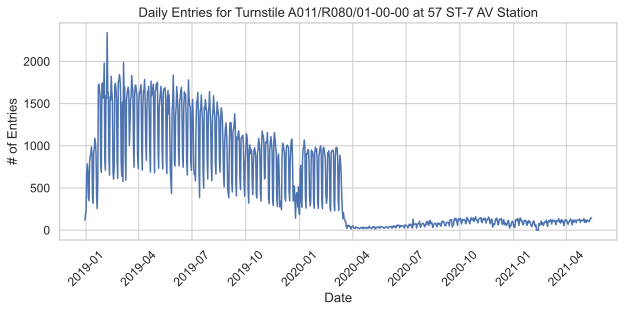

In [45]:
plt.figure(figsize=(10,4));
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station');

### Problem 8

Plot the daily time series for a station.

In [46]:
station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV'].copy()
station_daily_57_av.head()

,STATION,DATE,DAILY_ENTRIES
72769,57 ST-7 AV,2018-12-30,13351.0
72770,57 ST-7 AV,2018-12-31,21131.0
72771,57 ST-7 AV,2019-01-01,17115.0
72772,57 ST-7 AV,2019-01-02,33333.0
72773,57 ST-7 AV,2019-01-03,35464.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

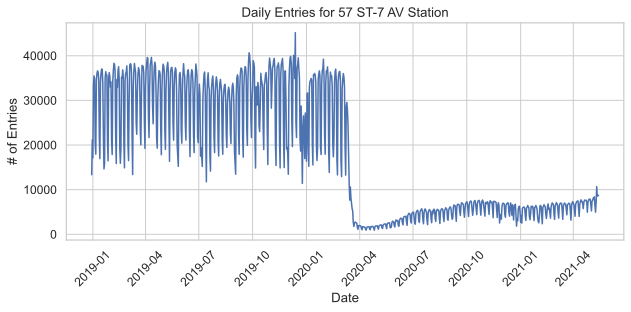

In [47]:
plt.figure(figsize=(10, 4))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')

In [48]:
# Bussiest station
station_daily_34_ST_PENN_STA = station_daily[station_daily['STATION'] == '34 ST-PENN STA'].copy()
station_daily_34_ST_PENN_STA.head()

,STATION,DATE,DAILY_ENTRIES
52863,34 ST-PENN STA,2018-12-30,84869.0
52864,34 ST-PENN STA,2018-12-31,113628.0
52865,34 ST-PENN STA,2019-01-01,66386.0
52866,34 ST-PENN STA,2019-01-02,161139.0
52867,34 ST-PENN STA,2019-01-03,165817.0


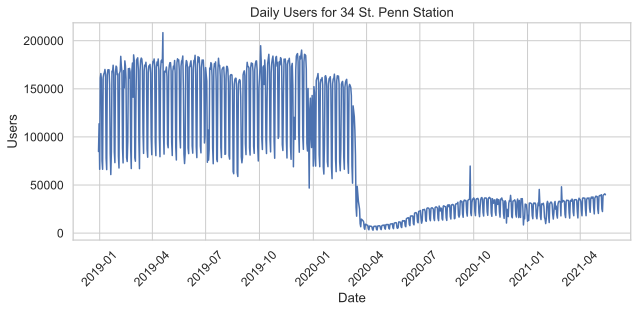

In [49]:
#Bussiest station
plt.figure(figsize=(10, 4))
plt.plot(station_daily_34_ST_PENN_STA['DATE'], station_daily_34_ST_PENN_STA['DAILY_ENTRIES'])
plt.ylabel('Users')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Users for 34 St. Penn Station')
plt.savefig('34_ST_PENN_STA.png', bbox_inches='tight')

In [50]:
#Most inactive station
station_daily_BEACH_105_ST = station_daily[station_daily['STATION'] == 'BEACH 105 ST'].copy()
station_daily_BEACH_105_ST.head()

,STATION,DATE,DAILY_ENTRIES
121892,BEACH 105 ST,2018-12-30,49.0
121893,BEACH 105 ST,2018-12-31,121.0
121894,BEACH 105 ST,2019-01-01,41.0
121895,BEACH 105 ST,2019-01-02,222.0
121896,BEACH 105 ST,2019-01-03,224.0


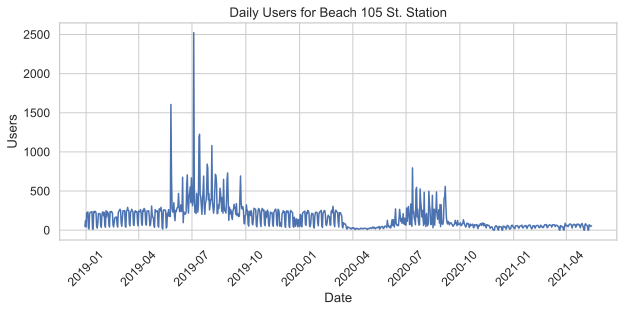

In [51]:
#Most inactive station
plt.figure(figsize=(10, 4))
plt.plot(station_daily_BEACH_105_ST['DATE'], station_daily_BEACH_105_ST['DAILY_ENTRIES'])
plt.ylabel('Users')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Users for Beach 105 St. Station')
plt.savefig('BEACH_105_ST.png', bbox_inches='tight')

### Problem 9

Make a list of counts for **one week** for **one station**: Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for all weeks available. 

`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

*Hint: [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek) and [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.isocalendar.html) may prove useful.*

In [52]:
import numpy as np

In [53]:
station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily['DATE']).dt.dayofweek
station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.isocalendar().week
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
0,1 AV,2018-12-30,11989.0,6,52
1,1 AV,2018-12-31,14786.0,0,1
2,1 AV,2019-01-01,9989.0,1,1
3,1 AV,2019-01-02,18476.0,2,1
4,1 AV,2019-01-03,19866.0,3,1


### Problem 10

Make a single list of these total ridership values (i.e., the daily entries) and plot their histogram with

```
plt.hist(total_ridership_counts)
```

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

**(Optional)**: If you want to see which stations take the meat of the traffic, sort the total ridership dataframe, and plot station-counts on a `plt.bar` graph. For this, you want to have two lists: the indices of each bar (stations), and the values (entries).

```
# pseudo-code:
plt.bar(x=stations, height=daily_entries)
```

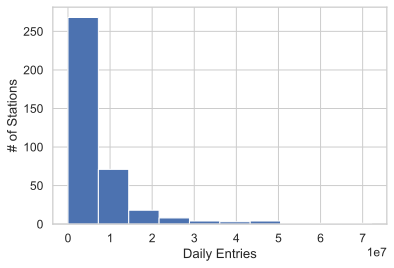

In [54]:
plt.hist(station_totals['DAILY_ENTRIES']);
plt.xlabel('Daily Entries')
plt.ylabel('# of Stations');

In [55]:
station_totals.tail()

,STATION,DAILY_ENTRIES
354,TOMPKINSVILLE,342936.0
148,BEACH 98 ST,250538.0
162,BROAD CHANNEL,147786.0
141,BEACH 105 ST,138564.0
309,ORCHARD BEACH,8959.0


View top ten stations

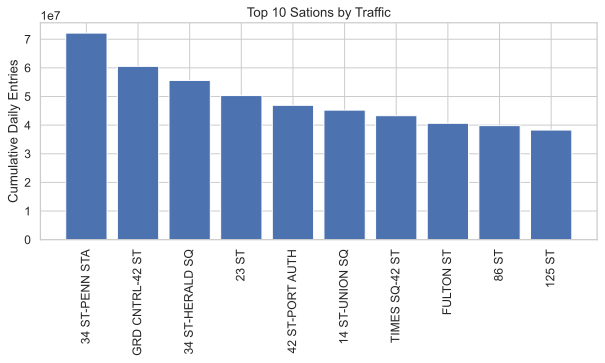

In [56]:
plt.figure(figsize=(10, 4))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90);
plt.ylabel("Cumulative Daily Entries");
plt.title('Top 10 Sations by Traffic');
plt.savefig('top10.png', bbox_inches='tight')

In [57]:
station_totals['STATION'][-10:-1]


147        BEACH 90 ST
143        BEACH 36 ST
120    AQUEDUCT N.COND
333    ROCKAWAY PARK B
144        BEACH 44 ST
354      TOMPKINSVILLE
148        BEACH 98 ST
162      BROAD CHANNEL
141       BEACH 105 ST
Name: STATION, dtype: object

View bottom ten stations

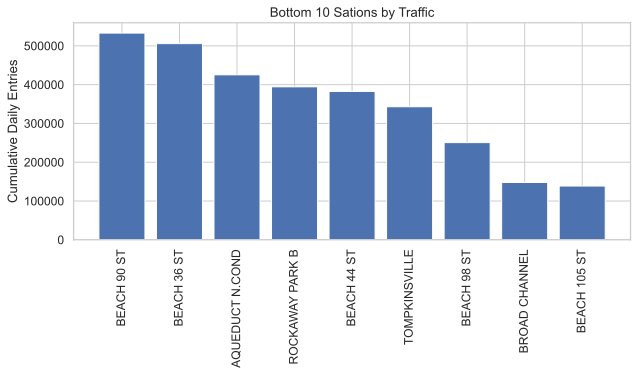

In [58]:
plt.figure(figsize=(10, 4))
plt.bar(x=station_totals['STATION'][-10:-1], height=station_totals['DAILY_ENTRIES'][-10:-1])
plt.xticks(rotation=90);
plt.ylabel("Cumulative Daily Entries");
plt.title('Bottom 10 Sations by Traffic');
plt.savefig('bottom10.png', bbox_inches='tight')

In [59]:
station_daily['DATE'].dt.month
# df['day'] = df.datetime.dt.day

0         12
1         12
2          1
3          1
4          1
          ..
327529     5
327530     5
327531     5
327532     5
327533     5
Name: DATE, Length: 327534, dtype: int64

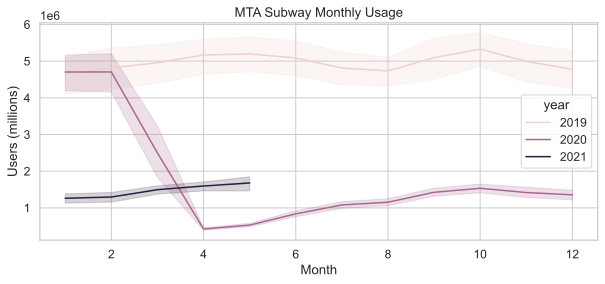

In [60]:
import statsmodels.api as sm
import seaborn as sns

plt.figure(figsize=(10, 4))
total_station_daily['Month'] = pd.to_datetime(total_station_daily.DATE).dt.month
total_station_daily['year'] = pd.to_datetime(total_station_daily.DATE).dt.year
sns_lineplot = sns.lineplot(x='Month',y='DAILY_ENTRIES',hue='year',data=total_station_daily.query('year>2018'))
plt.ylabel('Users (millions)')

plt.title('MTA Subway Monthly Usage')
plt.savefig('MTA_entries1.png', bbox_inches='tight')

Text(0.5, 1.0, 'MTA Daily Entries')

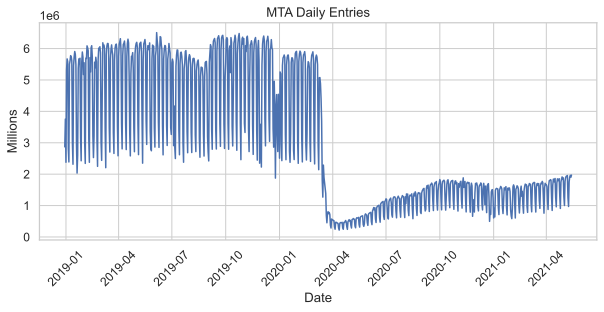

In [61]:
plt.figure(figsize=(10, 4))
plt.plot(total_station_daily['DATE'], total_station_daily['DAILY_ENTRIES'])
plt.ylabel('Millions')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('MTA Daily Entries')

In [62]:
total_station_daily.DAILY_ENTRIES.value_counts().sort_index()

219883.0     1
243358.0     1
246659.0     1
247972.0     1
282989.0     1
            ..
6407714.0    1
6421325.0    1
6422694.0    1
6478885.0    1
6506963.0    1
Name: DAILY_ENTRIES, Length: 867, dtype: int64

In [63]:
total_station_daily.DAILY_ENTRIES.sum()

2670720161.0

In [64]:
total_station_daily.DAILY_ENTRIES.describe()

count    8.670000e+02
mean     3.080415e+06
std      2.135095e+06
min      2.198830e+05
25%      1.263450e+06
50%      2.317512e+06
75%      5.636412e+06
max      6.506963e+06
Name: DAILY_ENTRIES, dtype: float64